
# DATA

Tatoeba is a large database of sentences and translations. Its content is ever-growing and results from the voluntary contributions of thousands of members.

Tatoeba provides a tool for you to see examples of how words are used in the context of a sentence. You specify words that interest you, and it returns sentences containing these words with their translations in the desired languages. The name Tatoeba (for example in Japanese) captures this concept.

The project was founded by Trang Ho in 2006, hosted on Sourceforge under the codename of multilangd


https://tatoeba.org/en/downloads


Another dataset used is english-Irish pairs scraped from https://www.achtanna.ie/ via Irish legislation from the parallel corpus is available here for download in a number of TMX files.https://www.gaois.ie/en/corpora/parallel/data

Gaois is a research group in Fiontar & Scoil na Gaeilge, DCU, that develops innovative resources to support the Irish language and its herit

ref:

Search phrases from dataset :

https://www.gaois.ie/en/corpora/parallel?Query=Apple&Language=en&SearchMode=exact&PerPage=50

https://github.com/kscanne/gaelspella
https://cadhan.com/

https://kevinscannell.com/files/ccgb.pdf


- XCOMET:
-  is Our models are exclusively trained on publicly
available DA and MQM annotations, most of which
have been collected by WMT over the recent years.ge.

---

### notes:

- Gaois dataset uses a standerdised version of the Irish language, while Tatoeba *may* contain teh more uanced differences between Connact,Ulster,Leinster versions of Irish/Gaeliga. https://kevinscannell.com/files/ccgb.pdf
- Tatoeba would more likley have erros and appears to be smaller sentences (assumption need to verify) than paragraphs of the legal texts (also a lot more forual langauge expected in legal texts)
- Irish is also an offical EU language so there are lots of EU documents, but appears they need to be requested directly from EU https://www.bruegel.org/dataset/dataset-eu-legislation-digital-world as not made readily availbe by Gaois.ict.

In [39]:
import xml.etree.ElementTree as ET
import pandas as pd
import json
import openai
from openai import OpenAI
import random


# Set pandas display options to avoid truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [56]:
# Tatoeba dataset
df_tatoeba = pd.read_csv('Sentence pairs in Irish-English - 2024-07-11.tsv', sep='\t')

In [ ]:
df_tatoeba.head(3)

In [60]:
len(df_tatoeba)

2508

In [32]:
# for the Gaois datasets
def parse_tmx(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []
    for tu in root.findall('.//tu'):
        tuid = tu.attrib.get('tuid')
        collection = None
        source = None
        eng_lang = None
        ga_lang = None
        
        for prop in tu.findall('prop'):
            if prop.attrib.get('type') == 'collection':
                collection = prop.text
            elif prop.attrib.get('type') == 'source':
                source = prop.text
        
        for tuv in tu.findall('tuv'):
            lang = tuv.attrib.get('{http://www.w3.org/XML/1998/namespace}lang')
            seg = tuv.find('seg').text
            seg = seg.replace('\n', ' ').replace('\r', ' ') if seg else seg
            if lang == 'en':
                eng_lang = seg
            elif lang == 'ga':
                ga_lang = seg
        
        data.append([tuid, collection, source, eng_lang, ga_lang])

    df = pd.DataFrame(data, columns=['tuid', 'prop_type_collection', 'prop_type_source', 'eng_lang', 'ga_lang'])
    return df


In [42]:
# Gaois datasets
df = parse_tmx('18.10.25-gaois.ie-crp-tmx-irish-legislation-constitution.tmx')
df_2 = parse_tmx('18.10.25-gaois.ie-crp-tmx-irish-legislation-primary-1922-1949.tmx')
df_3 = parse_tmx('18.10.25-gaois.ie-crp-tmx-irish-legislation-primary-1950-1979.tmx')
df_4 = parse_tmx('18.10.25-gaois.ie-crp-tmx-irish-legislation-primary-1980-2014.tmx')
df_5 = parse_tmx('18.10.25-gaois.ie-crp-tmx-irish-legislation-secondary-court-rules.tmx')
df_6 = parse_tmx('18.10.25-gaois.ie-crp-tmx-irish-legislation-secondary.tmx')

In [40]:
df.head(2)

,tuid,prop_type_collection,prop_type_source,eng_lang,ga_lang
0,566142,"Bunreacht na hÉireann, 1937|Constitution of Ireland 1937",Bunreacht na hÉireann 1937,"CONSTITUTION OF IRELAND 1937 Enacted by the People 1st July, In operation as from 29th December, 1937 This text of the Constitution is a copy of the text enrolled on 27 May, 1999 pursuant to Article 25.5.2°","BUNREACHT NA hÉIREANN CONSTITUTION OF IRELAND D’achtaigh an Pobal an 1 Iúil, 1937 I ngníomh ón 29 Nollaig, 1937, An téacs seo den Bhunreacht is cóip é den téacs a cuireadh isteach ina iris an 27 Bealtaine,1999, de dhroim Airteagal 25.5.2°"
1,566143,"Bunreacht na hÉireann, 1937|Constitution of Ireland 1937",Bunreacht na hÉireann 1937,except that : the Transitory Provisions (Articles 5163) are omitted as required by their terms;,ach amháin maidir leis na nithe seo a leanas : tá na Forálacha Sealadacha (Airteagail 5163) fágtha ar lár mar a cheanglaítear le téarmaí na nAirteagal sin;


In [54]:
print(f'df = {len(df)}, df_2 = {len(df_2)}, df_3 = {len(df_3)}, df_4 = {len(df_4)}, df_5 = {len(df_5)}, df_6 = {len(df_6)}')


df = 466, df_2 = 272145, df_3 = 325040, df_4 = 315252, df_5 = 26661, df_6 = 44521


In [63]:
df_gaois = pd.concat([df, df_2, df_3, df_4, df_5, df_6], ignore_index=True)

In [69]:
len(df_gaois)

984085

In [72]:
# Export the dataframes to a CSV file
df_gaois.to_csv('Gaois.csv', index=False)
df_tatoeba.to_csv('Tatoeba.csv', index=False)

## Formatting for LLM (to train translator)

In [11]:
#df_gaois = pd.read_csv('Gaois.csv')
df_gaois = pd.read_csv('Gaois.csv',  low_memory=False)


In [12]:
nan_count = df_gaois['tuid'].isna().sum()
nan_count

np.int64(176)

In [13]:
df_gaois = df_gaois.dropna(subset=['tuid'])

In [14]:
nan_count = df_gaois['tuid'].isna().sum()
nan_count

np.int64(0)

In [19]:
len(df_gaois)

983909

In [21]:
print(df_gaois.dtypes)


tuid                    object
prop_type_collection    object
prop_type_source        object
eng_lang                object
ga_lang                 object
dtype: object


In [29]:
print(df_gaois.columns)

Index(['tuid', 'prop_type_collection', 'prop_type_source', 'eng_lang',
       'ga_lang'],
      dtype='object')


In [31]:
df_gaois.head(2)


,tuid,prop_type_collection,prop_type_source,eng_lang,ga_lang
0,566142,"Bunreacht na hÉireann, 1937|Constitution of Ireland 1937",Bunreacht na hÉireann 1937,"CONSTITUTION OF IRELAND 1937 Enacted by the People 1st July, In operation as from 29th December, 1937 This text of the Constitution is a copy of the text enrolled on 27 May, 1999 pursuant to Article 25.5.2°","BUNREACHT NA hÉIREANN CONSTITUTION OF IRELAND D’achtaigh an Pobal an 1 Iúil, 1937 I ngníomh ón 29 Nollaig, 1937, An téacs seo den Bhunreacht is cóip é den téacs a cuireadh isteach ina iris an 27 Bealtaine,1999, de dhroim Airteagal 25.5.2°"
1,566143,"Bunreacht na hÉireann, 1937|Constitution of Ireland 1937",Bunreacht na hÉireann 1937,except that : the Transitory Provisions (Articles 5163) are omitted as required by their terms;,ach amháin maidir leis na nithe seo a leanas : tá na Forálacha Sealadacha (Airteagail 5163) fágtha ar lár mar a cheanglaítear le téarmaí na nAirteagal sin;


In [39]:
# Rename columns 'eng_lang' and 'ga_lang' to 'en' and 'ga'
df = df_gaois.rename(columns={'eng_lang': 'en', 'ga_lang': 'ga'})

# Convert DataFrame rows to JSONL format
jsonl_output = []
for _, row in df.iterrows():
    json_obj = {
        'en': row['en'],
        'ga': row['ga']
    }
    jsonl_output.append(json_obj)

# Write JSONL output to a file
output_file = 'gaois_900k.jsonl'
with open(output_file, 'w', encoding='utf-8') as f:
    for line in jsonl_output:
        json.dump(line, f, ensure_ascii=False)
        f.write('\n')

print(f"JSONL file '{output_file}' has been successfully created.")

JSONL file 'gaois_900k.jsonl' has been successfully created.


- Claude prefers xml while ..
- GPT favors Markdown and JSO
- Axolotl uses JSONLN

### taking a subsample of 900k as too expensive to run entore dataset via GPT4o

In [45]:
import pandas as pd
import json
import random

# Load the DataFrame (assuming df_gaois is already loaded)
# If not, uncomment the next line and specify the correct path
# df_gaois = pd.read_csv('your_file.csv')

# Rename columns 'eng_lang' and 'ga_lang' to 'en' and 'ga'
df = df_gaois.rename(columns={'eng_lang': 'en', 'ga_lang': 'ga'})

# Function to clean and validate text
def clean_text(text):
    if pd.isna(text):
        return ''
    cleaned_text = str(text).strip()
    # Check if the text is just a number followed by a period
    if cleaned_text.rstrip('.').isdigit():
        return ''
    return cleaned_text

# Function to check if text contains [GA] or [EN]
def contains_tags(text):
    return '[GA]' in text or '[EN]' in text

# Convert DataFrame rows to JSONL format, excluding entries with [GA] or [EN] and numbers with a full stop
output_file = 'gaois_cleaned.jsonl'
excluded_count = 0
included_count = 0

with open(output_file, 'w', encoding='utf-8') as f:
    for _, row in df.iterrows():
        en_text = clean_text(row['en'])
        ga_text = clean_text(row['ga'])
        
        if contains_tags(en_text) or contains_tags(ga_text):
            excluded_count += 1
            continue
        
        # Skip entries that are just numbers followed by a period
        if en_text == '' and ga_text == '':
            excluded_count += 1
            continue
        
        json_obj = {
            'en': en_text,
            'ga': ga_text
        }
        json.dump(json_obj, f, ensure_ascii=False)
        f.write('\n')
        included_count += 1

print(f"JSONL file '{output_file}' has been successfully created.")
print(f"Included entries: {included_count}")
print(f"Excluded entries: {excluded_count}")

# Now, let's take a random sample of 2,000 entries
sample_size = 2000
output_sample_file = 'gaois_cleaned_2k.jsonl'

# Read all lines from the cleaned file
with open(output_file, 'r', encoding='utf-8') as f:
    all_lines = f.readlines()

# Ensure we don't try to sample more lines than available
sample_size = min(sample_size, len(all_lines))

# Take a random sample
random.seed(42)  # for reproducibility
sampled_lines = random.sample(all_lines, sample_size)

# Write the sampled lines to a new file
with open(output_sample_file, 'w', encoding='utf-8') as f:
    f.writelines(sampled_lines)

print(f"Random sample of {sample_size} entries saved to '{output_sample_file}'")

# Optionally, verify the output
with open(output_sample_file, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        try:
            json.loads(line)
        except json.JSONDecodeError:
            print(f"Error in line {i+1}: {line}")
            break
    else:
        print("All lines in the sample are valid JSON objects.")


JSONL file 'gaois_cleaned.jsonl' has been successfully created.
Included entries: 628942
Excluded entries: 354967
Random sample of 2000 entries saved to 'gaois_cleaned_2k.jsonl'
All lines in the sample are valid JSON objects.


# Rename columns 'eng_lang' and 'ga_lang' to 'en' and 'ga'
df = df_gaois.rename(columns={'eng_lang': 'en', 'ga_lang': 'ga'})

# Function to clean and validate text
def clean_text(text):
    if pd.isna(text):
        return ''
    return str(text).strip()

# Function to check if text contains [GA] or [EN]
def contains_tags(text):
    return '[GA]' in text or '[EN]' in text

# Convert DataFrame rows to JSONL format, excluding entries with [GA] or [EN]
output_file = 'gaois_cleaned.jsonl'
excluded_count = 0
included_count = 0

with open(output_file, 'w', encoding='utf-8') as f:
    for _, row in df.iterrows():
        en_text = clean_text(row['en'])
        ga_text = clean_text(row['ga'])
        
        if contains_tags(en_text) or contains_tags(ga_text):
            excluded_count += 1
            continue
        
        json_obj = {
            'en': en_text,
            'ga': ga_text
        }
        json.dump(json_obj, f, ensure_ascii=False)
        f.write('\n')
        included_count += 1

print(f"JSONL file '{output_file}' has been successfully created.")
print(f"Included entries: {included_count}")
print(f"Excluded entries: {excluded_count}")

# Optionally, verify the output
with open(output_file, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        try:
            json.loads(line)
        except json.JSONDecodeError:
            print(f"Error in line {i+1}: {line}")
            break
    else:
        print("All lines are valid JSON objects.")

## GPT-4 Prompt
````
System:
You areahelpful translator and only output theresult. User:
### Translatethis from <sourcelanguage> to <target language>, <source language>:
<sourcesentence>
### <target language>:
------------------------------------------------------------------------------------------------------------
Translatethis from <sourcelanguage> to <target language>:
<sourcelanguage>: <sourcesentence>
<target lan
````

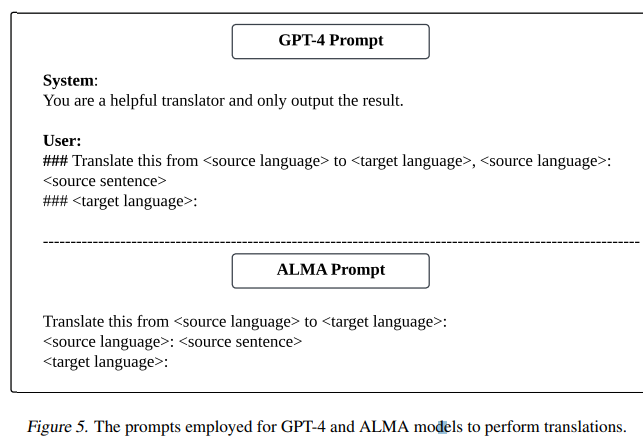guage>:


In [ ]:
# Test subset of larger dataset

In [49]:

# Set your OpenAI API key here
api_key = "sk-proj-xxxxxxxxxxxxxxxxxx"

# Initialize the OpenAI client with the API key
client = openai.OpenAI(api_key=api_key)

MODEL="gpt-4o"
input_file = 'gaois_cleaned_2k.jsonl'
output_file = 'gaois_cleaned_2k_gpt4_translated.jsonl'

In [51]:
def translate_text(source_language, target_language, source_sentence):
    prompt = f"""
System:
You are a helpful translator and only output the result.

User:
### Translate this from {source_language} to {target_language}, {source_language}:
{source_sentence}
### {target_language}:
"""
    
    response = client.chat.completions.create(
        model=MODEL,
        messages=[
            {"role": "system", "content": "You are a helpful translator."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=100,
        temperature=0.5
    )
    return response.choices[0].message.content.strip()

# Process the JSONL file
with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
    for line in infile:
        entry = json.loads(line)
        
        # English to Irish translation
        if 'en' in entry:
            irish_translation = translate_text("English", "Irish", entry['en'])
            entry['gpt_4_ga'] = irish_translation
        
        # Irish to English translation
        if 'ga' in entry:
            english_translation = translate_text("Irish", "English", entry['ga'])
            entry['gpt_4_en'] = english_translation
        
        # Write the updated entry to the output file
        json.dump(entry, outfile, ensure_ascii=False)
        outfile.write('\n')

print(f"JSONL file '{output_file}' has been successfully created with translations.")

JSONL file 'gaois_cleaned_2k_gpt4_translated.jsonl' has been successfully created with translations.


### error in dataset

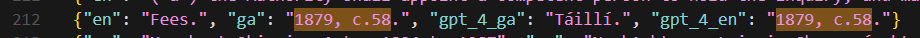

- 212 index of 2k sub sample
- {"en": " Fees. ", "ga": " 1879, c.58. "}
- which is in index 435964
- need to check if error is inherited from csv or if jsonl creation created the msimatch


yes so we can see in the csv generation: 

- 1191898,Achtanna an Oireachtais|Acts of the Oireachtas,1964-PUB-012, Fees. ," 1879, c.58. "
- should not that there is an act which disusses fees so must have been misaligned 


- next checking if error arises from converting dataset after import, but can also try the tool search website that it originated from

- 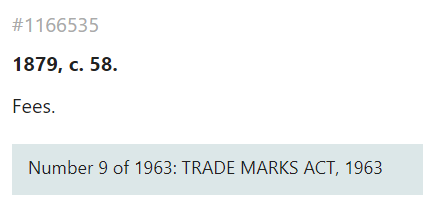
 
OK so it does, used https://www.gaois.ie/en/corpora/parallel?Query=1879%2C+c.58.&Language=ga&SearchMode=exact&PerPage=50&Page=1 and found one example of this misalignment

Another error in dataset includes eng traslations in irish section (index 225)

{"en": "The Roads Act, 1920", "ga": "An Roads Act, 1920.", "gpt_4_ga": "An tAcht Bóithre, 1920", "gpt_4_en": "The Roads Act, 1920."}


There also seems to be a fair amount of 'dsagreement'

{"en": "(2) Where—", "ga": "(2) Más rud é—", "gpt_4_ga": "(2) I gcás—", "gpt_4_en": "(2) If it is the case—"}

https://inirish.bitesize.irish/how-to-say/9206-where claims its actually neither, cá háit = where
But sentence context may affect this? will need to consult irish speaker.

Google trabslate states where = i gcás ina , so closer to chatgpt




- There appears to be more errors in shorter sentences/chunks compared to fully formed sentences/paragraphs